### 000000 playground

##### Playground

In [122]:
ticker = '002930'

In [123]:
%%html
<style>
table {float:left}
</style>

In [124]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [126]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,0.43,0.43,"485,946,771 ( 22.1%)","302,324,364 ( 16.3%)","145,804,786 ( 42.0%)"
2018-12-31,0.45,0.45,"398,085,273 ( 9.2%)","259,880,888 ( 8.2%)","102,710,074 ( 11.5%)"
2017-12-31,0.50,0.50,"364,554,480 ( -0.7%)","240,231,804 ( -8.6%)","92,134,325 ( 9.7%)"
2016-12-31,0.46,0.46,"367,272,236 ( 10.5%)","262,940,331 ( 9.0%)","83,968,461 ( 4.8%)"
2015-12-31,0.54,0.54,"332,233,959 ( 15.5%)","241,179,418 ( 6.8%)","80,129,799 ( 25.1%)"
2014-12-31,NaN,NaN,"287,640,660 ( 19.2%)","225,795,993 ( 15.8%)","64,069,892 ( 37.6%)"
2013-12-31,NaN,NaN,"241,370,200 ( nan%)","194,960,578 ( nan%)","46,577,175 ( nan%)"


In [127]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"265,709,460 (117.7%)","75,218,513 (115.4%)"
2020-06-30,"198,643,961 ( 64.3%)","54,489,435 ( 36.9%)"
2020-03-31,"133,953,242 ( 13.6%)","31,735,539 (-26.2%)"
2019-12-31,"125,038,239 ( 18.3%)","28,086,688 ( 10.2%)"
2019-09-30,"122,031,301 ( 18.4%)","34,916,259 ( 17.1%)"
2019-06-30,"120,915,544 ( 30.7%)","39,804,840 ( 94.9%)"
2019-03-31,"117,961,687 ( 21.8%)","42,996,998 ( 59.4%)"
2018-12-31,"105,695,132 ( 11.4%)","25,488,803 ( 24.4%)"
2018-09-30,"103,033,190 ( 8.0%)","29,814,466 ( 6.3%)"


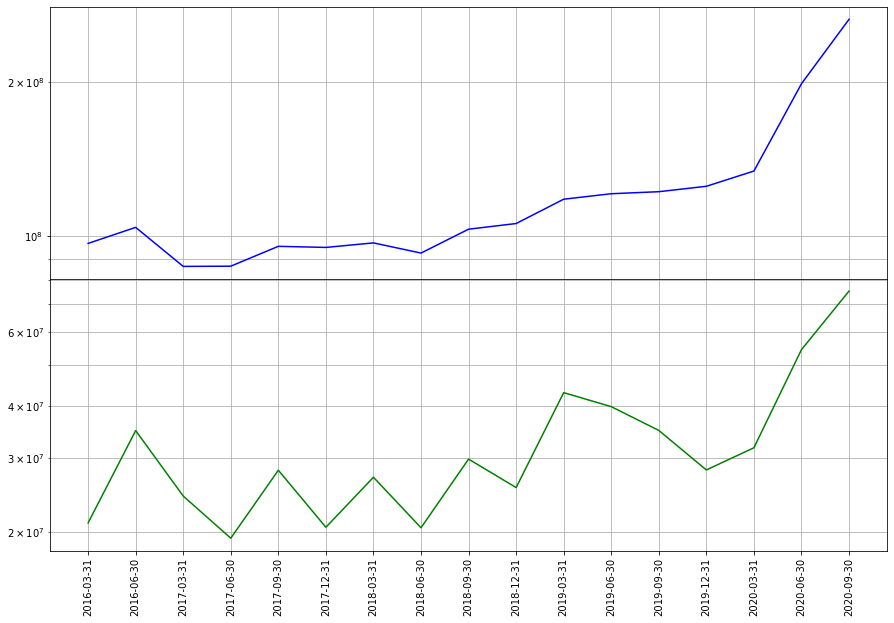

In [128]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [129]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,61.3,29.5
2018-12-31,58.1,25.8
2017-12-31,56.6,25.3
2016-12-31,56.8,22.9
2015-12-31,59.2,24.2
2014-12-31,59.3,23.0
2013-12-31,60.2,19.4


In [130]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"485,946,771 ( 22.1%)","1,368,419 ( -8.0%)","149,651,113 ( 17.0%)","61,391,154 ( 30.8%)"
2018-12-31,"398,085,273 ( 9.2%)","1,487,221 (-54.6%)","127,957,093 (454.0%)","46,934,925 ( 25.2%)"
2017-12-31,"364,554,480 ( -0.7%)","3,278,171 ( -1.5%)","23,098,635 (117.0%)","37,490,382 ( 5.4%)"
2016-12-31,"367,272,236 ( 10.5%)","3,329,352 ( -6.8%)","10,646,931 ( 71.3%)","35,553,485 (-40.0%)"
2015-12-31,"332,233,959 ( 15.5%)","3,571,826 ( 4.5%)","6,215,927 (-72.5%)","59,297,431 ( 13.3%)"
2014-12-31,"287,640,660 ( 19.2%)","3,417,240 ( -3.4%)","22,615,790 (117.6%)","52,328,156 ( 80.5%)"
2013-12-31,"241,370,200 ( nan%)","3,538,060 ( nan%)","10,392,567 ( nan%)","28,993,533 ( nan%)"


In [131]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权        滚动市盈率         前复权增长
      first   last   min    max       
交易日期                                  
2018   6.53  13.75  32.3  171.3  110.6
2019  13.90  11.33  33.8   69.7  -18.5
2020  11.49  20.25  28.9   79.1   76.2

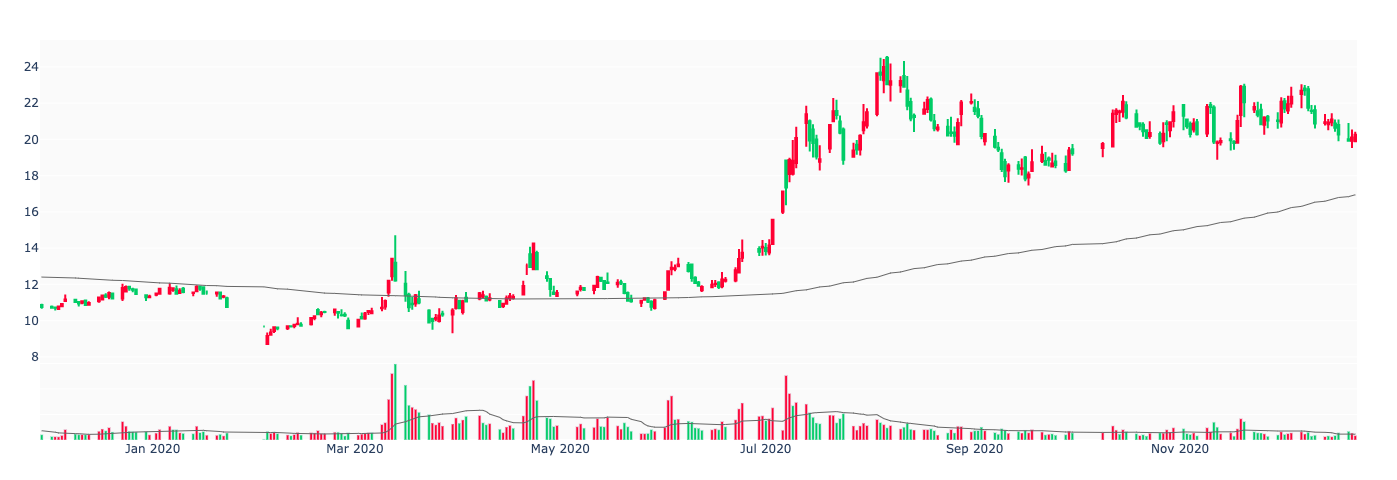

In [132]:
draw(mkt, 260, 200, 20)